In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import en_core_web_sm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS

DATASET_COLUMNS  = ['sentiment','id','date','query','user','text']
data=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', names=DATASET_COLUMNS ,header=None)
print("Dataset shape:", data.shape)

Dataset shape: (1600000, 6)


In [2]:
data.head(10)

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [3]:
# Finding different types of sentiments provided in the dataset
print(data.groupby('sentiment').count())

               id    date   query    user    text
sentiment                                        
0          800000  800000  800000  800000  800000
4          800000  800000  800000  800000  800000


In [4]:
# Replacing the value 4 -> 1 for ease of understanding.
data['sentiment'] = data['sentiment'].replace(4,1)
data.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# Describing the dataset
data.describe()

,sentiment,id
count,1600000.0,1.600000e+06
mean,0.5,1.998818e+09
std,0.5,1.935761e+08
min,0.0,1.467810e+09
25%,0.0,1.956916e+09
50%,0.5,2.002102e+09
75%,1.0,2.177059e+09
max,1.0,2.329206e+09


In [6]:
# check the number of positive vs. negative tagged sentences
positives = data['sentiment'][data.sentiment == 1 ]
negatives = data['sentiment'][data.sentiment == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         1600000
No. of positve tagged sentences is:  800000
No. of negative tagged sentences is: 800000


In [7]:
#remove hashtags
def remove_hashtags(sentence):
    return re.sub(r'[^a-zA-Z]', " ",sentence)

#Remove usernames
def remove_usernames(sentence):
    return re.sub(r'@[A-Z0-9a-z_:]+','',sentence)

# Removing the tweet tags
def remove_retweet_tags(sentence):
    return re.sub(r'^[RT]+','',sentence)

#Removes the urls if any
def remove_urls(sentence):
    return re.sub(r'(http|https|ftp)?://[A-Za-z0-9./]+','',sentence)

# Performs the tweet cleaning step
def clean_tweet(tweet):
    tweet = remove_usernames(tweet)
    tweet = remove_retweet_tags(tweet)
    tweet = remove_urls(tweet)
    #tweet = remove_hashtags(tweet)
    return tweet.strip()

# remove all the stopwords from the provided tweet
def remove_stopwords(tweet):
    return " ".join([word for word in tweet.split(" ") if word.lower() not in nlp.Defaults.stop_words])

# preprocessor fucntion to process the records
def preproccess_pipeline(tweet):
    tweet = clean_tweet(tweet)
    tweet = remove_stopwords(tweet)
    return tweet

# get a word count per of text
def word_count(words):
    return len(words.split())

In [8]:
# Converting the provided the tweet text to a formatted text:
# Removed stop words
# Removed urls
# Removed URL's
# Removed Tags
nlp = en_core_web_sm.load()
data['processed_tweets'] = data['text'].apply(preproccess_pipeline)
data.head()

,sentiment,id,date,query,user,text,processed_tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- Awww, that's bummer. shoulda got David Carr..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset can't update Facebook texting it... cry ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived times ball. Managed save 50% rest bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's behaving all. i'm mad. here? can't th..."


               id    date   query    user    text  processed_tweets
sentiment                                                          
0          800000  800000  800000  800000  800000            800000
1          800000  800000  800000  800000  800000            800000


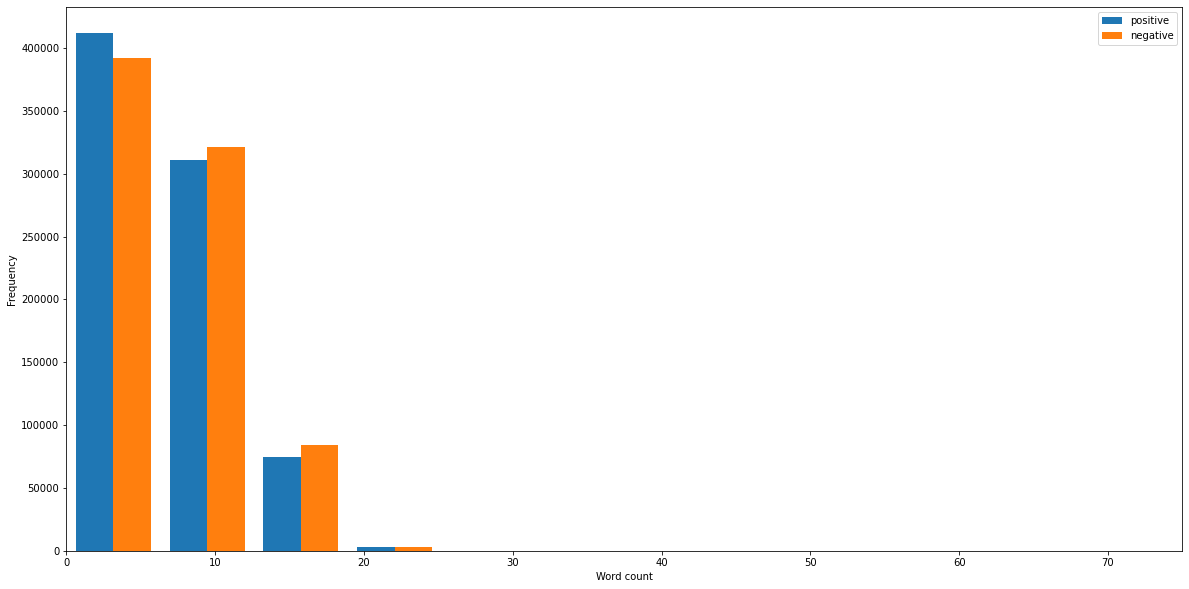

In [9]:
# Plotting word count present in positive and negative tweets
print(data.groupby('sentiment').count())
data['word_count'] = data['processed_tweets'].apply(word_count)
p = data['word_count'][data.sentiment == 1]
n = data['word_count'][data.sentiment == 0]
plt.figure(figsize=(20,10))
plt.xlim(0,75)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], label=['positive','negative'])
plt.legend(loc='upper right')

In [10]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['processed_tweets']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(10)

[("i'm", 127616),
 ('good', 77367),
 ('like', 75425),
 ("it's", 64419),
 ('going', 62290),
 ('got', 60454),
 ('day', 60235),
 ('love', 60141),
 ('work', 48195),
 ("don't", 48095)]

C:\Users\bojjam\miniconda3\envs\letsdo\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sentiment', ylabel='count'>

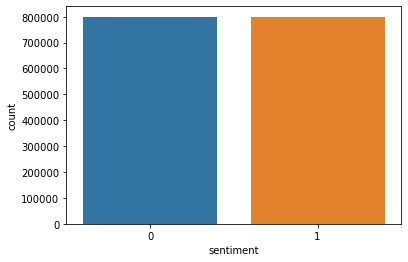

In [11]:
sns.countplot(data['sentiment'])

In [12]:
#Prnting top 2000 words occuring the positive tweets
#plt.figure(figsize = (15,15)) 
#wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 0].processed_tweets))
#plt.imshow(wc , interpolation = 'bilinear')

In [13]:
#Prnting top 2000 words occuring the negative tweets
#plt.figure(figsize = (15,15)) 
#wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 1].processed_tweets))
#plt.imshow(wc , interpolation = 'bilinear')

In [19]:
# Extrcting the processed_tweets and sentiments
X = data['processed_tweets'].values
y = data['sentiment'].values

In [20]:
# Performing TFID Vectorization where we find the probabilty of the words occuring.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print('TfidfVectorizer.')
print('No. of feature_words: ', len(vector.get_feature_names()))

TfidfVectorizer.
No. of feature_words:  293194


In [21]:
from keras.preprocessing.text import Tokenizer
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split the data in training and testing set
# using the same return object of X_train for both models requires the data type conversiona and around 2TB of memory.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)
max_words=512
sentences = data['processed_tweets'].tolist()
labels = data['sentiment'].tolist()
training_size = int(len(sentences) * 0.8)

X_train1 = data[0: training_size]#.reshape(20000,512)
#print(len(X_train1))
X_test1 = sentences[: training_size]#.reshape(2500,512)
#print(len(X_test1))
y_train1 = labels[0: training_size]#.astype(np.int)
y_test1 = labels[: training_size]#.astype(np.int)

# create a new Tokenizer
tokenizer = Tokenizer(num_words=max_words)
# feed our tweets to the Tokenizer
tokenizer.fit_on_texts(X_train1)
X_train1 = tokenizer.texts_to_sequences(X_train1)
X_train1 = pad_sequences(X_train1, maxlen=512, padding='post', truncating='post')
# treat the labels as categories
y_train1 = keras.utils.to_categorical(y_train1, 5)

X_train1 = np.asarray(X_train1)
X_test1 = np.asarray(X_test1)
y_train1 = np.asarray(y_train1)
y_test1 = np.asarray(y_test1)

In [23]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
      
    # print confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    
    labels = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
                    
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels,group_counts)]
    labels = np.asarray(labels).reshape(2,2)       #Building a design for the confusion matrix
    sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='BuPu')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title('Sentiments')
    plt.plot()

Accuracy of model on training data : 81.585
Accuracy of model on testing data : 76.57296875 

              precision    recall  f1-score   support

           0       0.77      0.76      0.77    640450
           1       0.76      0.77      0.77    639550

    accuracy                           0.77   1280000
   macro avg       0.77      0.77      0.77   1280000
weighted avg       0.77      0.77      0.77   1280000



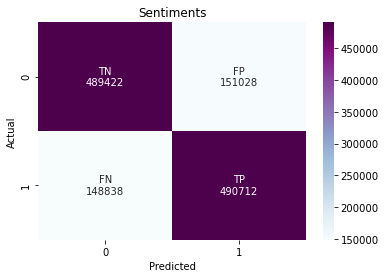

In [24]:
# Perfoming Naive Baye's classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

max_words = 512
model = Sequential()
model.add(Dense(max_words, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train1, y_train1,batch_size=32,epochs=5,verbose=1,validation_split=0.2,shuffle=True)

Epoch 1/5
1/1 [==============================] - 0s 160ms/step - loss: 1.2234 - accuracy: 0.3333 - val_loss: 0.8806 - val_accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 1.0101 - accuracy: 0.3333 - val_loss: 0.5455 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 1.2662 - accuracy: 0.5000 - val_loss: 0.3212 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 0.7784 - accuracy: 0.6667 - val_loss: 0.1851 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 0.5115 - accuracy: 1.0000 - val_loss: 0.1057 - val_accuracy: 1.0000
